In [26]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("USA_Housing.csv")

In [24]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [25]:
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

<Axes: >

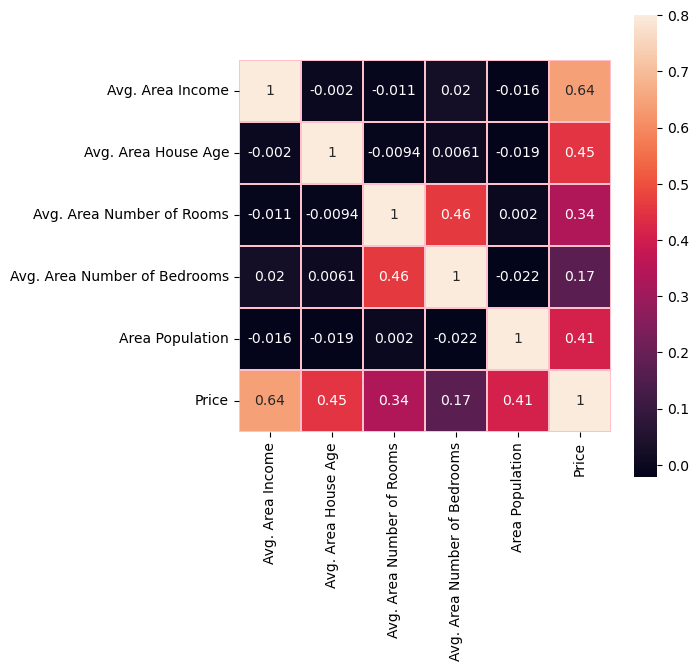

In [28]:
corr=data.corr()
plt.figure(figsize=(6, 6))
sns.heatmap(corr, vmax=.8, linewidths=0.05,square=True,annot=True,linecolor="pink")

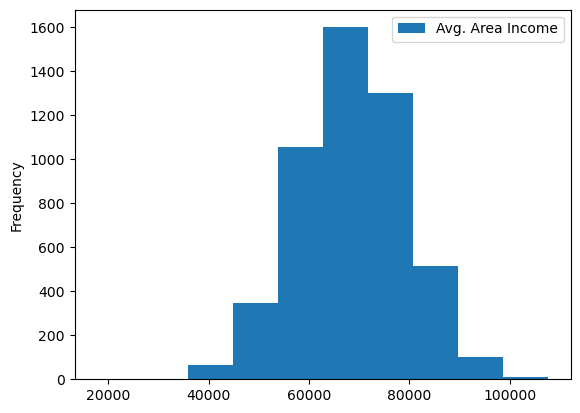

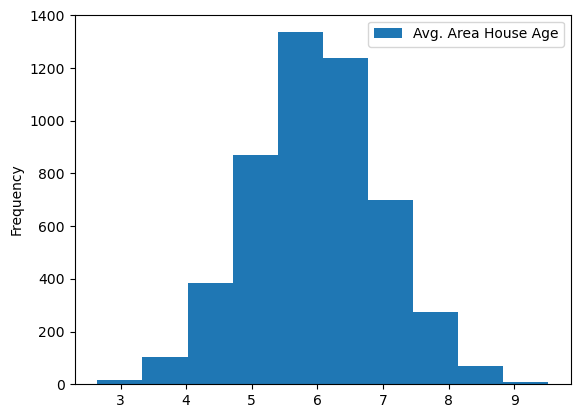

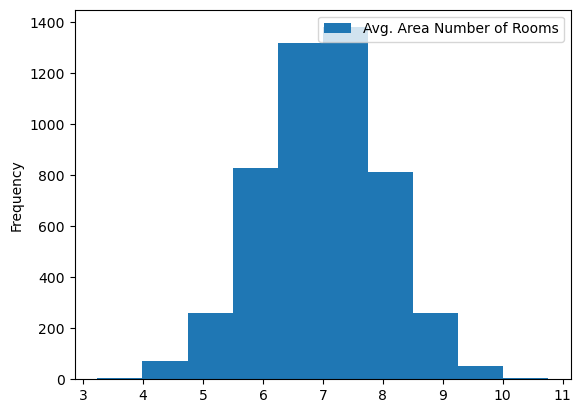

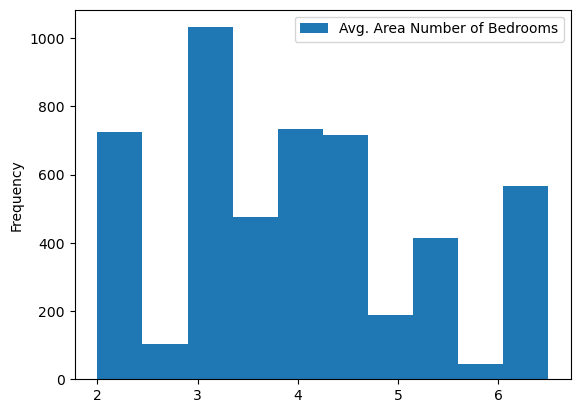

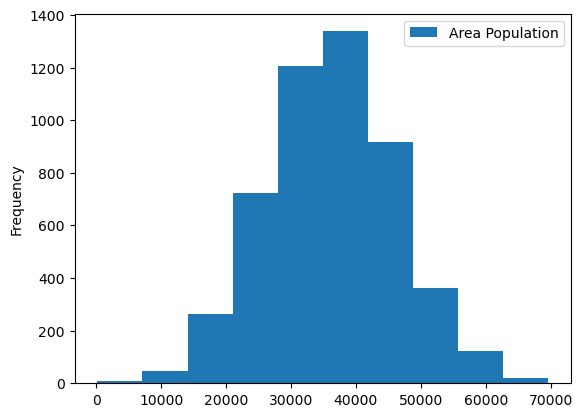

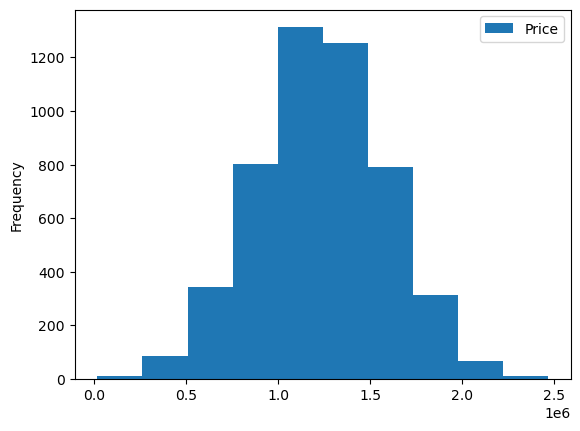

In [31]:
for i in data.columns[:-1]:
    data[[i]].plot.hist()

In [21]:
y=data[['Price']]
x=data.drop(columns=['Price','Address'])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lr=LinearRegression()

In [40]:
model=lr.fit(X_train,y_train)

In [48]:
model.score(X_train,y_train)

0.9179787435623722

In [49]:
model.score(X_test,y_test)

0.9179971706834289

In [50]:
lr.intercept_

array([-2635072.90093336])

In [52]:
lr.coef_

array([[2.16522058e+01, 1.64666481e+05, 1.19624012e+05, 2.44037761e+03,
        1.52703134e+01]])

In [53]:
lr.predict(X_test)

array([[1308587.92699759],
       [1237037.22949434],
       [1243429.34030681],
       [1228900.2136037 ],
       [1063320.9071083 ],
       [1544058.05034861],
       [1094774.70493019],
       [ 833284.72339225],
       [ 788412.85578719],
       [1469714.86615709],
       [ 671728.43662062],
       [1606818.21977961],
       [1004166.61331065],
       [1796798.9759592 ],
       [1288566.96221027],
       [1087782.93301076],
       [1423072.37492533],
       [1078178.68169677],
       [ 802286.03537898],
       [ 930761.0369571 ],
       [1134829.86477822],
       [ 916398.42023144],
       [1489972.69335433],
       [1284580.15538816],
       [1582071.35322737],
       [1132519.15991992],
       [1089888.39644517],
       [ 974510.51872155],
       [ 924057.96820648],
       [1740759.72092282],
       [1286481.59512311],
       [1621289.95171608],
       [1435264.2016172 ],
       [1234014.77924477],
       [1485434.57300368],
       [1718335.00753702],
       [1538953.74882858],
 

In [54]:
X_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1501,61907.593345,7.017838,6.440256,3.25,43828.947207
2586,57160.202243,6.893260,6.921532,3.13,43467.147035
2653,70190.796445,6.745054,6.662567,2.01,29215.136112
1055,69316.796889,6.300409,7.873576,4.28,24448.211461
705,72991.481649,3.412866,6.494081,2.48,50626.495426
...,...,...,...,...,...
4711,77267.656264,3.939501,8.342808,6.09,22487.712072
2313,75967.135085,5.939370,6.111658,2.32,38897.091584
3214,81013.615294,7.149797,7.239105,5.44,45472.049451
2732,86762.882864,6.530193,5.106962,2.09,47724.581355


### Formül

Price = -2635072.90093336 + 21.652*Avg. Area Income	+ 164666.481* Avg. Area House Age + 119624.012*Avg. Area Number of Rooms + 2440.37761 * Avg. Area Number of Bedroom + 15.2703134*Area Population

In [55]:
Price = -2635072.90093336 + 21.652*61907.593345		+ 164666.481* 7.017838 + 119624.012*6.440256 + 2440.37761 *3.25 + 15.2703134*43828.947207

In [56]:
Price

1308575.2459631744

In [58]:
lr.predict(X_test[0:1])

array([[1308587.92699759]])

In [59]:
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
r2_score(y_test,lr.predict(X_test))

0.9179971706834289

In [71]:
def model(x,y):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    print("Model Score:", r2_score(y_test, lr.predict(X_test)))

In [72]:
model(x,y)

Model Score: 0.9179971706834289


In [64]:
from sklearn.linear_model import ElasticNet

enet_model = ElasticNet().fit(X_train, y_train)
y_pred = enet_model.predict(X_test)

r2_score(y_test, y_pred)
#enet_model.coef_

#enet_model.intercept_

0.8735171828391082

In [69]:
from sklearn.linear_model import RANSACRegressor

#model kurulumu
model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=10)
model.fit(X_train, y_train)

RANSACRegressor(base_estimator=LinearRegression(), estimator=LinearRegression(),
                max_trials=10)

In [70]:
r2_score(y_test, model.predict(X_test))

0.9124530010463726